In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import datetime as dt
import math

In [2]:
data=pd.read_csv('StatewiseTestingDetails.csv')
data

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
5,2020-05-19,Andaman and Nicobar Islands,6965.0,NaN,33.0
6,2020-05-20,Andaman and Nicobar Islands,7082.0,NaN,33.0
7,2020-05-21,Andaman and Nicobar Islands,7167.0,NaN,33.0
8,2020-05-22,Andaman and Nicobar Islands,7263.0,NaN,33.0
9,2020-05-23,Andaman and Nicobar Islands,7327.0,NaN,33.0


In [3]:
%matplotlib inline
tn=data[data['State']=='Tamil Nadu']
tn["Date"] = pd.to_datetime(tn["Date"]).dt.strftime("%Y%m%d")


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
tn['Date']=tn['Date'].astype(int)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
tn=tn.drop(['State','TotalSamples','Negative'],axis=1)


In [6]:
tn=tn[tn['Date']>20200600]
for i in range(0,len(tn)+1):
    tn['Date'][i:i+1]=(i+1)**2
tn['Date']

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


2294       1
2295       4
2296       9
2297      16
2298      25
2299      36
2300      49
2301      64
2302      81
2303     100
2304     121
2305     144
2306     169
2307     196
2308     225
2309     256
2310     289
2311     324
2312     361
2313     400
2314     441
2315     484
2316     529
2317     576
2318     625
2319     676
2320     729
2321     784
2322     841
2323     900
2324     961
2325    1024
Name: Date, dtype: int32

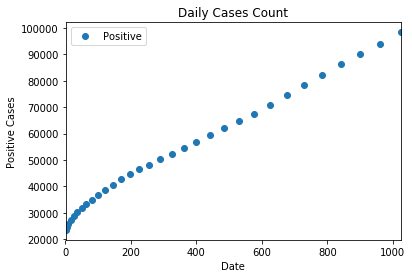

In [7]:
tn.plot(x='Date', y='Positive', style='o')
plt.title('Daily Cases Count')
plt.xlabel('Date')
plt.ylabel('Positive Cases')
plt.show()

In [8]:
X = tn.iloc[:, :-1].values
y = tn.iloc[:, 1].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
model = linear_model.LinearRegression().fit(X_train,y_train)

In [11]:
model.intercept_

28108.840846295978

In [12]:
y_pred=model.predict(X_test)

In [13]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
0,40698.0,38113.086155
1,64603.0,64860.547570
2,38716.0,36515.185862
3,25872.0,28734.106178
4,50193.0,48186.805389
5,46504.0,43740.474141
6,86224.0,86536.412405


In [31]:
tamilnadu=data[data['State']=='Tamil Nadu']
print(tamilnadu[tamilnadu['Date']=='2020-07-02'])
print(tamilnadu[tamilnadu['Date']=='2020-07-01'])

            Date       State  TotalSamples Negative  Positive
2325  2020-07-02  Tamil Nadu     1235692.0      NaN   98392.0
            Date       State  TotalSamples Negative  Positive
2324  2020-07-01  Tamil Nadu     1202204.0      NaN   94049.0


In [39]:
# Prediction for 2020-07-03
prediction=math.ceil(model.predict([[33**2]]))
print("Estimated Covid-19 cases is {}".format(prediction))

Estimated Covid-19 cases is 103766


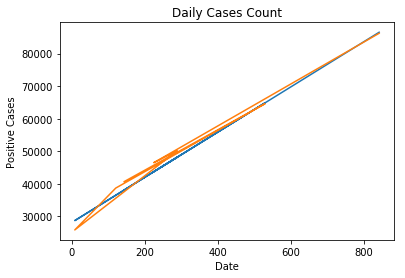

In [15]:
plt.plot(X_test,y_pred) # blue line
plt.plot(X_test,y_test) # orange line
plt.title('Daily Cases Count')
plt.xlabel('Date')
plt.ylabel('Positive Cases')
plt.show()

 We have this algorithm as a website: https://covid19predict.herokuapp.com